# Recherche par dichotomie dans une liste triée
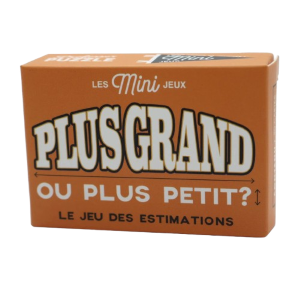

---
## Introduction

Lorsqu'on recherche un mot dans un dictionnaire :
- On ouvre lle dictionnaire au centre
- Le mot est soit sur cette page, soit avant, soit après
- En supposant qu’il soit avant, on le recherchera donc dans la première moitié du dictionnaire
- On ouvre la page du milieu de cette première moitié...
- On recommence jusqu’à obtenir la bonne page ou conclure que le mot n’est pas dans le dictionnaire


Vous avez déjà joué au jeu :
- $Trouve~un~nombre~entre~1~et~10$
- Proposé $5$
- Si la réponse est $~Plus~grand~$ vous proposez $7$ 
- Puis on vous répond $~Plus~petit~$ vous proposez $6$...  


Vous avez effectué une **recherche par dichotomie** !


## Définition

> 📌 Faire une **recherche dichotomique**, c'est chercher une valeur dans un tableau en prenant le **milieu** de l'ensemble des solutions possibles (qui sont donc triées) pour éliminer la moitié des possibilités à chaque étape.

Le but de ce TP est d'assimiler et implémenter la méthode puis de constater pourquoi cette méthode est intéressante à utiliser.

---
## Création d'une liste triée sans doublons

- La fonction `randint` du module `random` permet de générer aléatoirement des nombres entiers :

In [ ]:
# Import du module random
from random import randint

# Génération d'un nombre entre 1 et 10
randint(1,10)

- Le code suivant décrit une fonction nommée `liste_entiers_au_hasard(n)` paramétrée par un entier `n`, qui renvoie une liste de $n$ entiers choisis aléatoirement entre $1$ et $n$ en appelant successivement la fonction `randint`.

In [ ]:
# Import du module random
from random import randint

# Définition de la fonction (construction par compréhension)
def liste_entiers_au_hasard(n):
    return [randint(1,n) for x in range(n)]

# Exécution de la fonction avec 20 entiers
liste_entiers_au_hasard(20)

- Nous étudierons plus tard cette année différents algorithmes de tri, mais il existe une méthode ```sort``` permettant de trier une liste.  
Vérifiez la méthode avec le code ci-dessous :

In [ ]:
# Génération d'une liste avec notre fonction précédente
maliste = liste_entiers_au_hasard(20)

# Affichage de la liste
print ("Liste non triée :\t",maliste)

# Tri de la liste
maliste.sort()

# Affichage de la liste
print ("Liste triée :\t\t",maliste)

- Vous noterez que la liste générée peut contenir des doublons.  
La ligne de code suivant permet d'extraire les valeurs uniques d'une liste (`set`) dans un dictionnaire :

In [ ]:
# Suppression des doublons
set(maliste)

- Comme nous travaillons avec des listes, la ligne suivante permetra de convertir ce dictionnaire en liste (`list`)

In [ ]:
# Conversion en liste
list(set(maliste))

---
## Recherche par méthode brute

La première méthode qui nous viendra naturellement pour rechercher un élément dans une liste triée est la méthode brute. Elle consiste à parcourir la liste dans l'ordre et comparer chaque élément à l'élément recherché. Si l'élément en cours est l'élément recherché alors la fonction s'arrête et renvoie `True`. A la fin de la boucle, l'élément n'aura pas été trouvé et la fonction et renverra `False`.  

---
### 💻 EXERCICE 1 - Implémentation de la méthode brute
> Ecrivez ci-dessous une fonction `recherche_brute(elt,li)` qui prend en paramètres un élément `elt` et une liste `li`et **renvoie** `True` si l'élément est trouvé ou `False` sinon.  
>  
>💡 _Votre fonction devra parcourir la liste dans une boucle et comparer chaque élément au paramètre `elt`_.

In [ ]:
# à compléter


In [ ]:
# Vérification : doit renvoyer True
recherche_brute(19,[0, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 17, 19, 20])

In [ ]:
# Vérification : doit renvoyer False
recherche_brute(22,[0, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 17, 19, 20])

---
### Le module `timeit`

Pour mesurer le temps d'exécution d'une fonction, on peut utiliser le module `timeit`, les lignes suivantes permettront de mesurer la durée en secondes de la génération de 100 000 entiers choisis aléatoirement, de la stocker dans la variable `duree` et de l'afficher en millisecondes :

In [ ]:
# Import du module timeit
from timeit import default_timer as timer

# Lancement du chrono et stockage du début
debut_chrono = timer()

# Exécution du code à mesurer
liste_entiers_au_hasard(100000)

# Arrêt du chrono et stockage de la fin
fin_chrono = timer()

# Calcul de la durée (= fin - début)
duree = fin_chrono - debut_chrono

# Affichage de la durée en millisecondes (x1000 car le résultat est en secondes)
print(round(duree*1000))

---
### 💻 EXERCICE 2 - Performance de la méthode brute
> Ecrivez maintenant un programme qui : 
>1. Génère une liste de 300 000 entiers au hasard
>2. Trie la liste
>3. Supprime les doublons de la liste
>4. Recherche l'entier 300 000 dans la liste avec la fonction `recherche_brute` (pire des cas)
>5. Affiche si l'entier à été trouvé et en quelle durée (en millisecondes)
>  
> 💡 _Vous pourrez stocker le retour de la fonction `recherche_brute` dans un booléen qui vous permettra d'afficher si l'élément a été trouvé_.

<center><span style="color:red"><b><font size="3">
⚠️ Sauvegardez votre notebook avant de vous lancer dans l'écriture d'une fonction qui traite un gros volume de données.
</font></b></span></center>

In [ ]:
# à compléter


---
## Recherche par dichotomie

Soit `liste` une liste triée et `elt` l’élément à chercher, l'algorithme qui implémente cette méthode est le suivant :

```
    debut ← 0
    fin ← Indice du dernier élément de la liste - 1
    Tant que debut <= fin faire
        milieu=(debut+fin)//2
        Si liste[milieu] = elt alors
            retourner True
        Sinon
            Si liste[milieu] < elt alors
                debut ← milieu+1
            Sinon
                fin ← milieu-1
    retourner False
```

---
### 💻 EXERCICE 3 - Implémentation de la recherche par dichotomie
> A l'aide de cet algorithme, ecrivez ci-dessous une fonction `recherche_dicho(e,l)`qui prend en paramètres un élément `e` et une liste `l`et renvoie `True` si l'élément est trouvé ou `False` sinon.

In [ ]:
# à compléter


In [ ]:
# Vérification : doit renvoyer True
recherche_dicho(19,[0, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 17, 19, 20])    # Doit renvoyer True

In [ ]:
# Vérification : doit renvoyer False
recherche_dicho(22,[0, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 17, 19, 20])

---
### 💻 EXERCICE 4 - Performance de la recherche par dichotomie
> Ecrivez maintenant un programme qui : 
>1. Génère une liste de 300 000 entiers au hasard
>2. Trie la liste
>3. Supprime les doublons de la liste
>4. Recherche l'entier 300 000 dans la liste avec la fonction ```recherche_dicho``` (pire des cas)
>5. Affiche si l'entier à été trouvé et en quelle durée

In [ ]:
# à compléter


---
### 💻 EXERCICE 5 - Comparatif entre les deux méthodes
> Ecrivez maintenant un programme qui : 
>1. Génère une liste de 1 000 000 entiers au hasard
>2. Trie la liste
>3. Supprime les doublons de la liste
>4. Recherche l'entier 1 000 000 dans la liste avec la fonction `recherche_brute`
>5. Recherche l'entier 1 000 000 dans la liste avec la fonction `recherche_dicho`
>6. Affiche si l'entier à été trouvé et en quelle durée pour chacune des deux méthodes

In [ ]:
# à compléter


---
## Complexité des deux méthodes de recherche

### Recherche brute
Pour effectuer une recherche brute, nous allons successivement comparer l'élément recherché avec les éléments de la liste.  
Si nous sommes dans le pire des cas : l'élément est le dernier de la liste, nous allons donc effectuer autant de comparaisons que d'éléments dans la liste. Si `n` est le nombre d'éléments dans la liste nous effectuerons donc $n$ comparaisons.

> 📌 La complexité de la recherche brute est donc **linéaire** notée $\mathcal{O}(n)$  (💡_dites "Grand O de n"_)


### Recherche dichotomique
Pour effectuer une recherche dichotomique, nous allons comparer l'élément recherché l'élément central de la liste puis couper la liste en deux.  
Dans le pire des cas : l'élément est le dernier de la liste (ou le premier), nous diviser successivement le nombre d'éléments de la liste par 2. Si `n` est le nombre d'éléments dans la liste nous effectuerons donc $log_2(n)$ comparaisons.

> 📌 La complexité de la recherche dichotomique est donc **logarithmique** notée $\mathcal{O}(log_2(n))$

### Exemple :
Prenons par exemple la liste triée suivante :  
`[0, 3, 4, 5, 6, 9, 10, 11, 12, 14, 15, 16, 21, 23, 24, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 43, 44, 47, 48, 50, 51, 52]`  
Elle contient 32 éléments, recherchons le dernier élément `52` pour se positionner dans le pire des cas:

#### Recherche brute :
- Nous allons comparer 52 à tous les éléments de la liste un par un pour finalement le trouver.  
=> Le nombre de comparaisons est de $32$ soit le nombre d'éléments dans la liste 

#### Recherche dichotomique :
- Nous comparons 52 à l'élément central : 26 -> 1 comparaison
- Nous divisons la liste en deux et le nombre est plus grand
- Nous comparons 52 à l'élément central de la nouvelle liste : 39 -> 2 comparaisons
- Nous divisons la liste en deux et le nombre est plus grand
- Nous comparons 52 à l'élément central de la nouvelle liste : 47 -> 3 comparaisons
- Nous divisons la liste en deux et le nombre est plus grand
- Nous comparons 52 à l'élément central de la nouvelle liste : 51 -> 4 comparaisons
- Nous divisons la liste en deux et le nombre est plus grand
- Nous comparons 52 à l'élément central de la nouvelle liste : 52 -> 5 comparaisons  
=> Le nombre de comparaisons est donc  : $5$ soit $log_2(32)$ ( car $2^5~=~32$ )


### Dans notre dernier cas
Dans l'exercice 5 nous générons une liste de 1 000 000 éléments. En supprimant les doublons nous arrivons en moyenne à 600 000 éléments environ.  
- La recherche brute effectuera $600~000$ comparaisons en quelques millisecondes
- La recherche dichotomique effectuera $log_2(600~000)~=~19$ comparaisons quasiment instantanément